In [1]:
cd ..

/Users/johnphillips/Desktop/DSI/Cycling


In [2]:
%matplotlib inline

In [3]:
%run __init__.py

In [4]:
# Import pickled clean data:
lap1 = pd.read_pickle('data/lap1.p')
lap2 = pd.read_pickle('data/lap2.p')
lap3 = pd.read_pickle('data/lap3.p')

In [5]:
# Concatenate all three laps for better modeling

data = pd.concat([lap1, lap2, lap3], axis=0)

In [6]:
data.head()

,distance,latitude,longitude,altitude,power,cadence,speed,ankling_log_left,ankling_log_right,foot_range_log_left,foot_range_log_right,pedaling_delay_log_left,pedaling_delay_log_right,waist_angle_log_center,waist_d_rot_y_center,waist_d_rot_z_center,torso_angle_log_center,torso_d_rot_y_center,torso_d_rot_z_center
elapsed_time,,,,,,,,,,,,,,,,,,,
2,0.0,36.985600,136.79163,41,462.0,32.0,0.00,0.0,0.0,45.9,53.7,7.2,7.5,57.9,3.2,0.7,28.0,2.0,2.2
3,0.0,36.985603,136.79161,41,462.0,32.0,0.00,0.0,0.0,45.9,53.7,7.2,7.5,52.1,6.8,2.0,19.8,1.4,1.7
4,3.0,36.985607,136.79160,41,462.0,32.0,0.01,0.0,0.0,45.9,53.7,7.2,7.5,49.3,4.6,2.7,18.2,1.0,2.7
5,3.0,36.985622,136.79156,41,462.0,32.0,4.09,0.0,0.0,45.9,53.7,7.2,7.5,54.7,8.3,4.6,20.9,4.4,10.1
6,7.0,36.985695,136.79149,41,462.0,32.0,5.56,0.0,0.0,45.9,53.7,7.2,7.5,54.4,24.1,7.6,21.2,4.1,14.4


In [7]:
data.tail()

,distance,latitude,longitude,altitude,power,cadence,speed,ankling_log_left,ankling_log_right,foot_range_log_left,foot_range_log_right,pedaling_delay_log_left,pedaling_delay_log_right,waist_angle_log_center,waist_d_rot_y_center,waist_d_rot_z_center,torso_angle_log_center,torso_d_rot_y_center,torso_d_rot_z_center
elapsed_time,,,,,,,,,,,,,,,,,,,
3218,38408.0,36.985200,136.79156,47,348.0,89.0,13.01,6.3,0.0,41.8,53.4,14.4,1.4,48.5,6.0,6.0,13.2,9.8,11.2
3219,38422.0,36.985330,136.79153,47,392.0,88.0,12.87,0.0,0.0,47.0,53.4,10.8,1.5,47.4,9.0,5.2,9.0,9.8,10.0
3220,38435.0,36.985443,136.79150,47,355.0,88.0,12.89,0.0,12.4,47.0,53.4,23.7,13.6,48.0,6.9,5.5,15.2,7.8,10.3
3221,38447.0,36.985558,136.79147,47,50.0,84.0,12.72,0.0,12.4,47.0,53.4,23.7,13.6,44.0,4.7,6.3,16.2,8.9,10.5
3222,38462.0,36.985660,136.79144,47,0.0,0.0,12.35,0.0,12.4,47.0,53.4,23.7,13.6,47.2,4.4,7.3,15.3,5.8,6.1


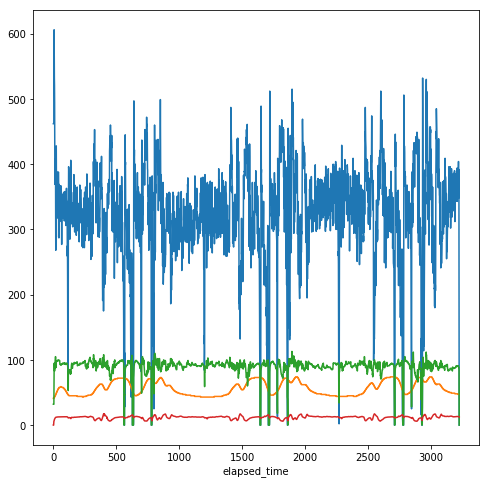

In [8]:
# Standard plot to inspect the join.
plt.figure(figsize=(8, 8))
data.power.plot()
data.altitude.plot()
data.cadence.plot()
data.speed.plot()
plt.show()

In [9]:
# Let's do a model focused on power.
X = data.drop(['power'], axis=1) 

# Make a y based upon Power
y = data['power']

In [10]:
# Standard split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 42)

## Tree Modeling

We know from the Benchmark that our Decision Tree Regressor was overfitting on the test data.  Let's fix that!

In [11]:
# Basic decision tree regression model
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Check the score on train and test
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

1.0
0.5779212691605208


In [12]:
# Loop through a few different max depths and check the performance
for d in [3, 5, 10, 15, 20]:
    dt = DecisionTreeRegressor(max_depth=d)
    dt.fit(X_train, y_train)

    # Print out the scores on train and test
    print 'max_depth=', str(d)
    print(dt.score(X_train, y_train))
    print(dt.score(X_test, y_test))
    print"--------"

max_depth= 3
0.6571682682519234
0.5763376684543291
--------
max_depth= 5
0.7779718593357478
0.64194341776902
--------
max_depth= 10
0.9221675598543903
0.6179219175257151
--------
max_depth= 15
0.9805104514983382
0.5622819353010313
--------
max_depth= 20
0.9969732449651985
0.5840668630772805
--------


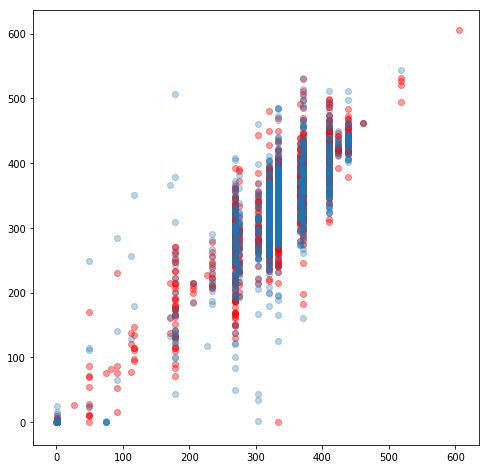

In [13]:
# Use the best max_depth of 5 from last model to fit a decision tree
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train, y_train)

# Make Predictions
train_predictions = dt.predict(X_train)
test_predictions = dt.predict(X_test)

# Predictions vs Actual Values
plt.figure(figsize=(8, 8))
plt.scatter(train_predictions, y_train, label='train', alpha=0.4, c='r') # Red is Train Data
plt.scatter(test_predictions, y_test, label='test', alpha=0.3,) # Blue is Test Data
plt.show()

## Random Forests

Can we improve our Decision Tree with a Forest?

In [14]:
# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train, y_train)

# Look at the R^2 scores on train and test
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.9761164770026467
0.7917367108952739


In [15]:
# Which hyperparameters score best?
# Create a dictionary to search
grid = {'n_estimators':[200], 'max_depth': [3, 5], 'max_features': [4, 8, 12], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(X_train, y_train)
    test_scores.append(rfr.score(X_test, y_test))

# Find best hyperparameters
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

(0.7047796857943143, {'n_estimators': 200, 'max_features': 12, 'random_state': 42, 'max_depth': 5})


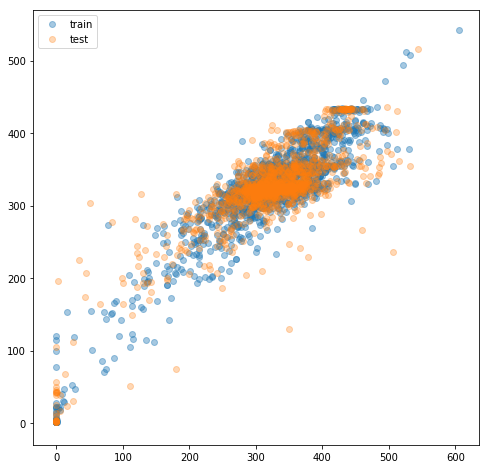

In [16]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=5, max_features=12, random_state=42)
rfr.fit(X_train, y_train)

# Make predictions with our model
train_predictions = rfr.predict(X_train)
test_predictions = rfr.predict(X_test)

# Create a scatter plot with train and test actual vs predictions
plt.figure(figsize=(8, 8))
plt.scatter(y_train, train_predictions, label='train', alpha=0.4) # Train data is blue
plt.scatter(y_test, test_predictions, label='test', alpha=0.3) # Test data is Orange
plt.legend()
plt.show()

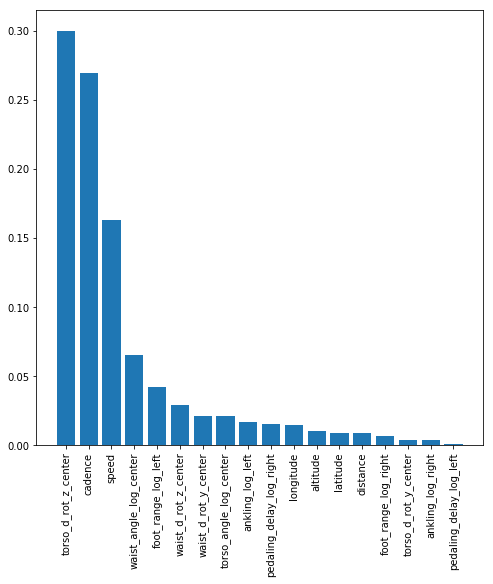

In [17]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_
feature_names = X.columns

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# Create tick labels 
labels = np.array(feature_names)[sorted_index]
plt.figure(figsize=(8, 8))
plt.bar(x, importances[sorted_index], tick_label=labels)
plt.xticks(rotation=90)
plt.show()

## What about Boosting?

In [18]:
# Create Gradient Boost Model
gbr = GradientBoostingRegressor(max_features=12,
                                learning_rate=0.02,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
gbr.fit(X_train, y_train)

print(gbr.score(X_train, y_train))
print(gbr.score(X_test, y_test))

0.8372328322407624
0.7376818963664806


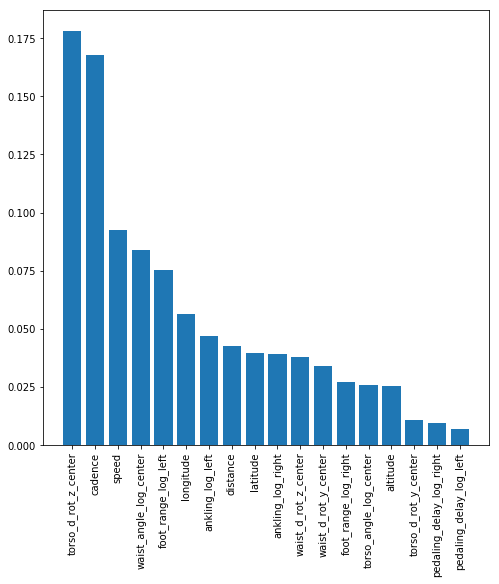

In [19]:
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_
features = X.columns

# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[::-1]
x = range(features.shape[0])

# Create tick labels 
labels = np.array(feature_names)[sorted_index]
plt.figure(figsize=(8, 8))
plt.bar(x, feature_importances[sorted_index], tick_label=labels)
plt.xticks(rotation=90)
plt.show()